In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinML/housing.csv')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


##Preprocessing the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [6]:
# Separate features and target
X = df.drop(columns=['median_house_value', 'ocean_proximity'])
y = df["median_house_value"]


In [7]:
num_features = X.select_dtypes(include=["float64", "int64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

In [8]:
cat_features

Index([], dtype='object')

In [9]:
# Preprocessing pipeline for numerical features
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # Handle missing values
    ("scaler", StandardScaler())                   # Normalize the data
])

# Preprocessing pipeline for categorical features
cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder())  # OneHotEncode the categorical variables
])

# Combine numerical and categorical pipelines
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

In [10]:
# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Check the shape of the processed features
X_preprocessed.shape

(20640, 8)

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Display the shape of the datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((16512, 8), (4128, 8), (16512,), (4128,))

Building the Model

In [15]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Flatten(),
    layers.Dense(1)
])


In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,137 (324.75 KB)

 Trainable params: 83,137 (324.75 KB)

 Non-trainable params: 0 (0.00 B)

Training The Model

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 30590246912.0000 - mean_absolute_error: 132680.6250 - val_loss: 5716239872.0000 - val_mean_absolute_error: 53471.5273
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6195475968.0000 - mean_absolute_error: 56502.5078 - val_loss: 4707964928.0000 - val_mean_absolute_error: 48391.4336
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5447435776.0000 - mean_absolute_error: 52896.7773 - val_loss: 4531300352.0000 - val_mean_absolute_error: 47985.1523
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5482784256.0000 - mean_absolute_error: 52765.2344 - val_loss: 4544613376.0000 - val_mean_absolute_error: 46976.1641
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5305743360.0000 - mean_absolute_error: 52186.6602 - val_loss: 4323185664.0000 - val_mean_absolute_error: 46209.9531
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5249774080.0000 - mean_absolute_error: 51788.6797 - val_lo

Evaualting the model

In [19]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on the test set: {test_mae}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3947416576.0000 - mean_absolute_error: 43090.4180
Mean Absolute Error on the test set: 42453.546875


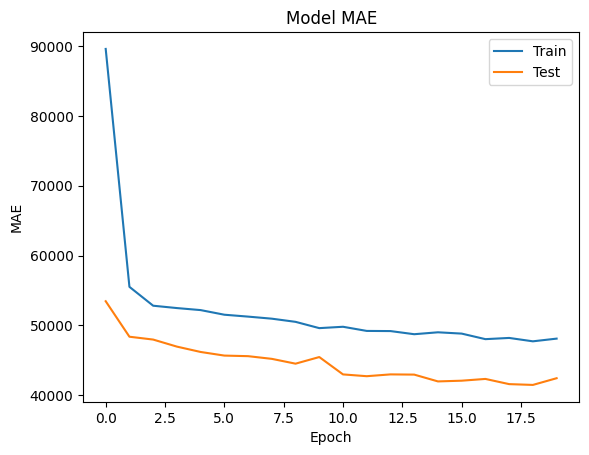

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation MAE values
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()
